<a href="https://colab.research.google.com/github/AIdepthLab/tabular-classification-demo/blob/main/notebooks/02_generative_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Generative AI for Tabular Data (SDV – GaussianCopula Demo)
Author: AIdepthLab  
Description: This notebook demonstrates synthetic tabular data generation using SDV (GaussianCopula) and evaluates quality using SDMetrics.  
This notebook is part of Fiverr (Generative AI / Synthetic Data).

In [ ]:
!pip install sdv
!pip install sdmetrics==0.17.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.3/193.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: sdmetrics
    Found existing installation: sdmetrics 0.17.0
    Uninstalling sdmetrics-0.17.0:
      Successfully uninstalled sdmetrics-0.17.0
  Using cached sdmetrics-0.17.0-py3-none-any.whl.metadata (8.7 kB)
Using cached sdmetrics-0.17.0-py3-none-any.whl (174 kB)
  Attempting uninstall: sdmetrics
    Found existing installation: sdmetrics 0.24.0
    Uninstalling sdmetrics-0.24.0:
      Successfully uninstalled sdmetr

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["PWD"] = ""

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from sdmetrics.reports.single_table import QualityReport

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

df.shape, df.head()

((569, 31),
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst texture  worst perimeter  w

In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

synth = GaussianCopulaSynthesizer(metadata)

synth.fit(df)
synthetic_df = synth.sample(num_rows=len(df))

synthetic_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,19.260,21.58,125.77,1120.6,0.08861,0.10516,0.181095,0.109009,0.1864,0.05904,...,28.99,143.68,1414.4,0.12937,0.27491,0.574190,0.210261,0.3122,0.08792,0
1,13.070,11.64,84.24,493.4,0.09700,0.11581,0.080838,0.028632,0.2022,0.06559,...,15.53,91.67,608.8,0.13834,0.30835,0.203433,0.101219,0.3433,0.09244,1
2,9.098,14.71,58.41,249.7,0.10208,0.10474,0.038018,0.022361,0.1939,0.07728,...,23.73,68.05,345.0,0.13836,0.17818,0.086703,0.072173,0.2780,0.08586,1
3,13.715,22.48,89.84,606.6,0.10338,0.12093,0.095254,0.046794,0.2133,0.07354,...,32.16,98.42,704.9,0.13301,0.23407,0.138035,0.110177,0.2745,0.09067,1
4,16.156,14.77,100.94,868.9,0.05263,0.02671,0.010892,0.007242,0.1358,0.05016,...,18.45,117.86,1114.6,0.09781,0.04487,0.027857,0.031918,0.2249,0.05771,1


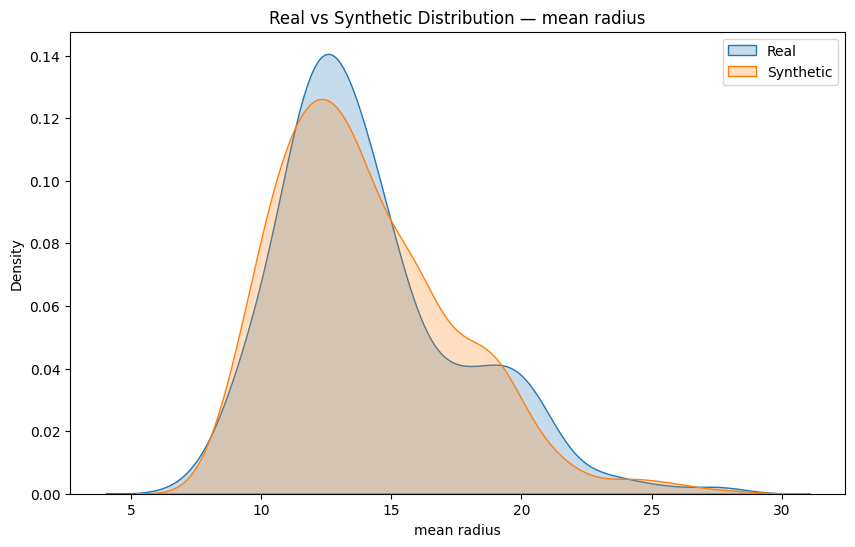

Saved figure: ../figures/synthetic_comparison_sdv.png


In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['mean radius'], label="Real", fill=True)
sns.kdeplot(synthetic_df['mean radius'], label="Synthetic", fill=True)
plt.title("Real vs Synthetic Distribution — mean radius")
plt.legend()

os.makedirs("../figures", exist_ok=True)
save_path = "../figures/synthetic_comparison_sdv.png"
plt.savefig(save_path, dpi=120)

plt.show()
print("Saved figure:", save_path)

In [ ]:
report = QualityReport()

metadata_dict = metadata.to_dict()

report.generate(
    real_data=df,
    synthetic_data=synthetic_df,
    metadata=metadata_dict
)

score = report.get_score()
score

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:00<00:00, 758.13it/s]|
Column Shapes Score: 91.93%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:02<00:00, 195.58it/s]|
Column Pair Trends Score: 95.4%

Overall Score (Average): 93.67%



np.float64(0.9366574284699403)

In [ ]:
details_shapes = report.get_details('Column Shapes')
details_shapes

,Column,Metric,Score
0,mean radius,KSComplement,0.954306
1,mean texture,KSComplement,0.966608
2,mean perimeter,KSComplement,0.949033
3,mean area,KSComplement,0.943761
4,mean smoothness,KSComplement,0.952548
5,mean compactness,KSComplement,0.927944
6,mean concavity,KSComplement,0.919156
7,mean concave points,KSComplement,0.908612
8,mean symmetry,KSComplement,0.947276
9,mean fractal dimension,KSComplement,0.910369


In [ ]:
details_trends = report.get_details('Column Pair Trends')
details_trends

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,mean radius,mean texture,CorrelationSimilarity,0.999801,0.323782,0.323384
1,mean radius,mean perimeter,CorrelationSimilarity,0.999963,0.997855,0.997782
2,mean radius,mean area,CorrelationSimilarity,0.997266,0.987357,0.992825
3,mean radius,mean smoothness,CorrelationSimilarity,0.975581,0.170581,0.121743
4,mean radius,mean compactness,CorrelationSimilarity,0.967152,0.506124,0.440428
...,...,...,...,...,...,...
460,worst concave points,worst fractal dimension,CorrelationSimilarity,0.976234,0.511114,0.463582
461,worst concave points,target,ContingencySimilarity,0.718805,NaN,NaN
462,worst symmetry,worst fractal dimension,CorrelationSimilarity,0.996635,0.537848,0.544578
463,worst symmetry,target,ContingencySimilarity,0.701230,NaN,NaN


In [ ]:
print("Generative AI Demo Completed Successfully!")

Generative AI Demo Completed Successfully!
